In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from pandas.tseries.offsets import MonthEnd
df_indicators = pd.read_csv("data/real.estate/idealista.indicators.csv", sep = ";", 
                            parse_dates=['PERIOD'], date_parser=lambda x: pd.datetime.strptime(x, '%Y%m')+MonthEnd(1))
df_indicators.head()

,LOCATIONID,PERIOD,ASSET_TYPE,OPERATION,UNITPRICE,PRICE,STOCK,DEMAND
0,0-EU-ES-28-07-001-079-01,2006-06-30,PL,SALE,3330.188964,449086.5,6,88.0
1,0-EU-ES-28-07-001-079-01,2006-09-30,PL,SALE,3431.024447,372673.0,12,91.0
2,0-EU-ES-28-07-001-079-01,2006-12-31,PL,SALE,3824.035136,428086.5,21,100.0
3,0-EU-ES-28-07-001-079-01,2007-03-31,PL,SALE,4161.561265,416750.0,28,101.0
4,0-EU-ES-28-07-001-079-01,2007-06-30,PL,SALE,4470.434783,369750.0,44,103.0


In [3]:
df_indicators.dtypes

LOCATIONID            object
PERIOD        datetime64[ns]
ASSET_TYPE            object
OPERATION             object
UNITPRICE            float64
PRICE                float64
STOCK                  int64
DEMAND               float64
dtype: object

In [4]:
df_areas = pd.read_csv("data/areas/areas.general.csv", sep = ";")
df_areas.head()

,LOCATIONID,LOCATIONNAME,WEALTH_IDX,AREA,POPULATION,DENSITY,I_COMMERCE,I_INDUSTRY,I_OFFICE,I_OTHER,...,N_1960_1969,N_1970_1979,N_1980_1989,N_1990_1999,N_2000_2010,SHOP,TOURIST,FOOD,GROSS_YIELD,HOMOGENEITY
0,0-EU-ES-28-07-001-079-14,Moratalaz,0.712609,610.739904,117486,192.366667,0.026281,0.000782,0.004131,0.015716,...,19689,17249,6690,18473,4543,167,3,52,3.329421,0.719321
1,0-EU-ES-28-07-001-079-09,Moncloa,1.658325,4647.242284,178617,38.435052,0.024735,0.001731,0.012502,0.084103,...,17093,16195,14715,24762,25644,127,120,207,3.072862,0.717098
2,0-EU-ES-28-07-001-079-13,Puente de Vallecas,0.664955,1493.239273,265338,177.692889,0.044640,0.005107,0.003470,0.018064,...,26103,18651,35006,31886,23479,26,13,34,3.700000,0.671040
3,0-EU-ES-28-07-001-079-12,Usera,0.615337,777.748892,160510,206.377665,0.041650,0.003603,0.005810,0.013451,...,14993,11473,14036,10297,30431,84,21,26,3.198725,0.692948
4,0-EU-ES-28-07-001-079-11,Carabanchel,0.638181,1481.735148,285427,192.630242,0.035957,0.010047,0.006916,0.014710,...,44035,30544,13319,14817,67726,112,19,107,3.305365,0.693639


In [5]:
df_areas_geo = pd.read_csv("data/areas/areas.geometries.csv", sep = ";")
df_areas_geo.head()

,LOCATIONID,LOCATIONNAME,WKT
0,0-EU-ES-28-07-001-079-14,Moratalaz,"POLYGON ((-3.66528 40.40639, -3.65724 40.40583..."
1,0-EU-ES-28-07-001-079-09,Moncloa,"POLYGON ((-3.83758 40.47266, -3.83608 40.47507..."
2,0-EU-ES-28-07-001-079-13,Puente de Vallecas,"POLYGON ((-3.68988 40.38236, -3.68327 40.38426..."
3,0-EU-ES-28-07-001-079-12,Usera,"POLYGON ((-3.72072 40.36478, -3.70365 40.36356..."
4,0-EU-ES-28-07-001-079-11,Carabanchel,"POLYGON ((-3.78023 40.36192, -3.75764 40.35733..."


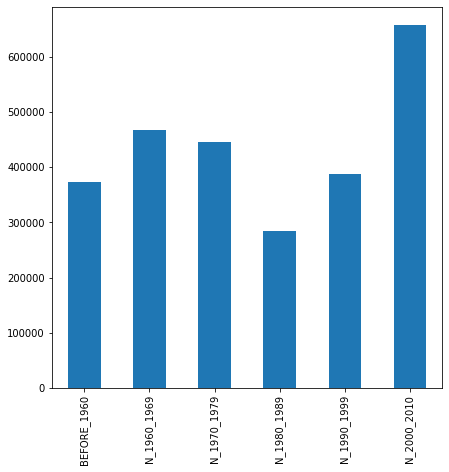

In [6]:
df_areas_new_propertys = df_areas.pivot_table(columns='LOCATIONID').loc[['BEFORE_1960','N_1960_1969','N_1970_1979','N_1980_1989','N_1990_1999','N_2000_2010'],]
# df_areas_new_propertys.plot(legend=False, figsize=(10,10))
df_areas_new_propertys.sum(axis=1).plot(kind='bar', figsize=(7,7))

In [7]:
df_indicators.groupby(['LOCATIONID']).mean().sort_values(['UNITPRICE']).merge(df_areas[['LOCATIONID','LOCATIONNAME']], on='LOCATIONID')

,LOCATIONID,UNITPRICE,PRICE,STOCK,DEMAND,LOCATIONNAME
0,0-EU-ES-28-07-001-079-13,1183.482960,99974.313850,30.884615,87.666667,Puente de Vallecas
1,0-EU-ES-28-07-001-079-12,1231.953398,101822.242600,18.153846,87.055556,Usera
2,0-EU-ES-28-07-001-079-02,1292.377821,91466.683587,32.102564,97.875000,Arganzuela
3,0-EU-ES-28-07-001-079-19,1303.015533,127760.512796,5.500000,84.142857,Vicálvaro
4,0-EU-ES-28-07-001-079-17,1399.481608,143337.056594,22.717949,85.352941,Villaverde
5,0-EU-ES-28-07-001-079-11,1476.028285,140774.307051,38.673077,89.592593,Carabanchel
6,0-EU-ES-28-07-001-079-20,1541.617885,250477.545036,25.134615,89.275862,San Blas
7,0-EU-ES-28-07-001-079-18,1625.067356,171702.767202,15.692308,87.761905,Villa de Vallecas
8,0-EU-ES-28-07-001-079-21,1687.581878,294546.961472,10.519231,87.185185,Barajas
9,0-EU-ES-28-07-001-079-01,1688.181357,168309.558396,34.884615,106.909091,Centro


In [8]:
df_indicators_period = df_indicators.pivot_table(index=['PERIOD','ASSET_TYPE','OPERATION'], columns='LOCATIONID')
df_indicators_period.mean(axis=1, level=0).head(8)

DEMAND          PRICE     STOCK  \
PERIOD     ASSET_TYPE OPERATION                                       
2006-06-30 PL         RENT             NaN    1006.149719  6.000000   
                      SALE       78.375000  363910.162413  5.714286   
           UN         RENT             NaN    2119.671471  0.764706   
                      SALE       83.000000  648759.184296  1.200000   
2006-09-30 PL         RENT       82.000000     918.219356  5.857143   
                      SALE       79.722222  317548.913144  6.476190   
           UN         RENT             NaN    1817.979673  0.823529   
                      SALE       77.250000  613907.796333  1.600000   

                                   UNITPRICE  
PERIOD     ASSET_TYPE OPERATION               
2006-06-30 PL         RENT         13.771456  
                      SALE       3478.028611  
           UN         RENT         15.252851  
                      SALE       4217.011996  
2006-09-30 PL         RENT         13.497111  
                      SALE       3397.429101  
           UN         RENT         16.826870  
                      SALE       4071.342733

C:\Users\RubenAcer\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


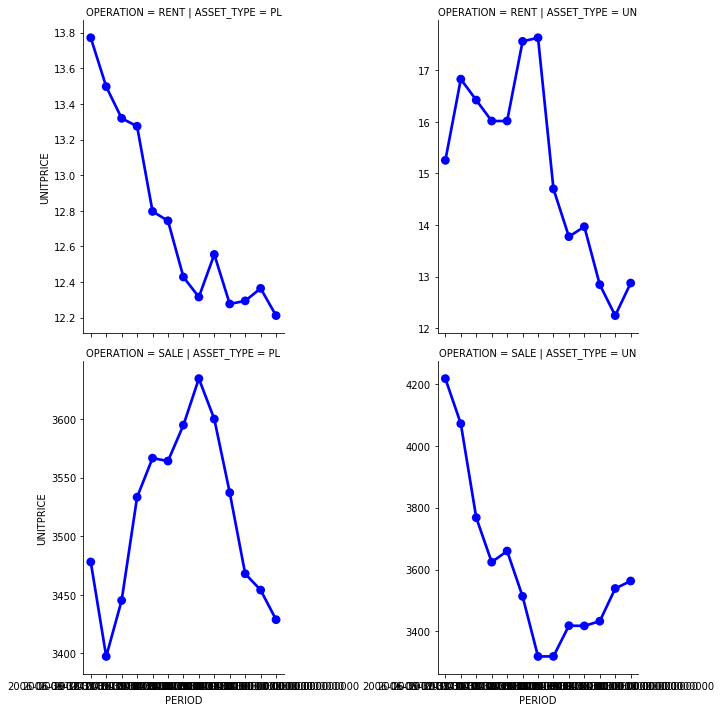

In [9]:
import matplotlib.pyplot as plt
df_sns = df_indicators_period.mean(axis=1, level=0).reset_index(level=[0,1,2])
info_a_plotear = 'UNITPRICE'
g = sns.factorplot(x='PERIOD', y=info_a_plotear, row='OPERATION', col='ASSET_TYPE', data=df_sns, kind='point', color='b', sharex=True, sharey=False)

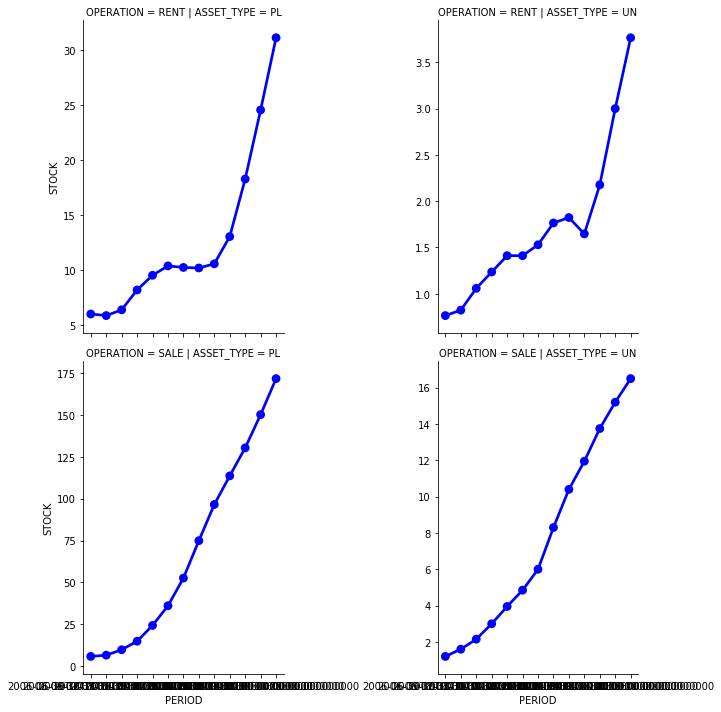

In [14]:
info_a_plotear = 'STOCK'
g = sns.factorplot(x='PERIOD', y=info_a_plotear, row='OPERATION', col='ASSET_TYPE', data=df_sns, kind='point', color='b', sharex=True, sharey=False)

In [10]:
import glob
macro_files = glob.glob("data/macro/*.csv")
dfs_macro = [pd.read_csv(f, sep=",", parse_dates=True, index_col="DateTime") for f in macro_files]
dfs_macro_names = [file[file.find("indicator_")+10:-4] for file in macro_files] 

dfs_macro_feq = [df['Frequency'].iloc[1] for df in dfs_macro]
list(zip(dfs_macro_feq, dfs_macro_names))

[('Monthly', 'consumer_price_index_cpi'),
 ('Quarterly', 'full_time_employment'),
 ('Yearly', 'gdp'),
 ('yearly', 'home_ownership_rate'),
 ('Monthly', 'housing_starts'),
 ('Quarterly', 'labour_costs'),
 ('Monthly', 'private_sector_credit'),
 ('Daily', 'stock_market')]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022E24BB1F60>,
      dtype=object)

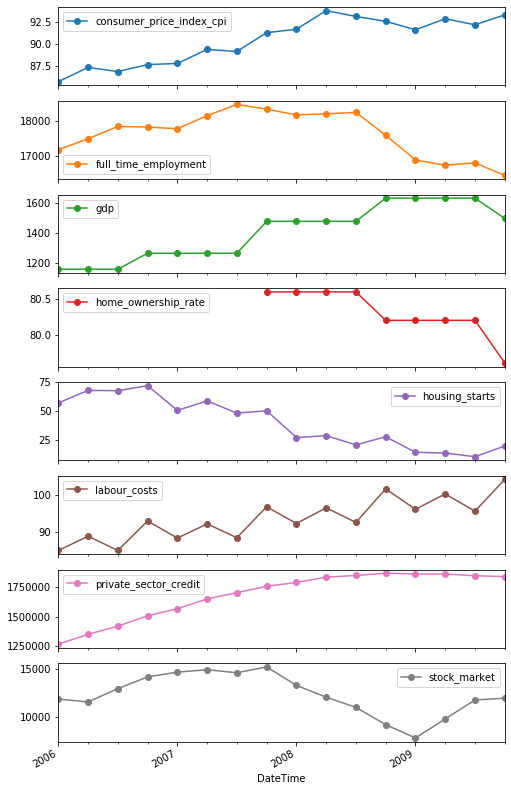

In [11]:
dfs_macro_Q = [df.resample('Q').last()['Value'] for df in dfs_macro]
df_all_macro_Q = pd.concat(dfs_macro_Q, axis=1)
df_all_macro_Q.columns = dfs_macro_names
df_all_macro_Q.ffill(inplace=True)

df_all_macro_Q.loc['2006':'2009'].plot(subplots=True, figsize=(8, 15), marker='o')  #logy=True

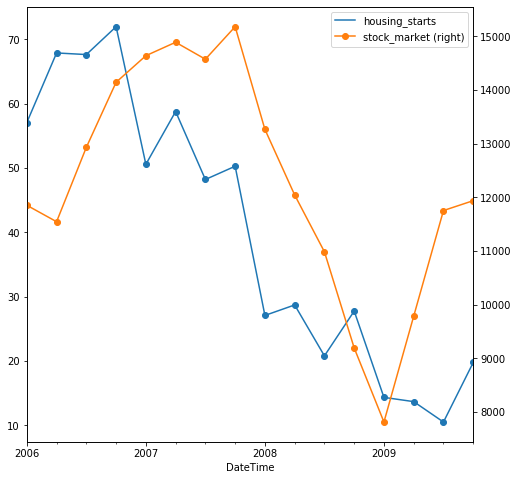

In [19]:
df_all_macro_Q.loc['2006':'2009', 'housing_starts'].plot(legend=True, figsize=(8, 8), marker='o')  #logy=True
df_all_macro_Q.loc['2006':'2009', 'stock_market'].plot(legend=True, secondary_y=True, marker='o') 

# Posibles conclusiones

Lo primero que habría que decir es que cualquiera de las siguientes conclusiones carece de mucha validez y certeza ya que se basan en la observación de un periodo concreto sobre el que tratamos de validar una hipótesis ya formulada y que sabemos que se da en ese periodo analizado (la crisis inmobiliaria). Además, considero que no tengo los conocimientos necesarios sobre economía para verificar que las conclusiones observadas en los datos tengan sentido lógico, por lo que podría estar confundiendo muy fácilmente correlación con causalidad.

Dicho esto, paso a exponer las observaciones que más me han llamado la atención:

- El número de obras iniciadas (housing_starts) parece que podría ser un indicador adelantado del devenir del Ibex35 (stock_market). La hipótesis tiene sentido si partimos de la premisa que la economía española estaba basada en la construcción en esos años, pero habría que tener cuidado si esta premisa cambia con el tiempo.


- Un aumento exponencial del número de inmuebles medios anunciados en Idealista (STOCK), agregando todas las zonas de Madrid, podría ser un indicador de que el mercado inmobiliario está entrando en recesión. Esta hipótesis tiene bastante sentido a priori, pero habría que ver hasta qué punto podría usarse como indicador adelantado, o solo como indicador de confirmación.


- Me resulta muy curioso como el precio unitario del m2 de los pisos (PL) en alquiler (RENT) y las casas (UN) en venta (SALE) fue disminuyendo durante todo el 2007, mientras que el precio unitario del m2 de las casas (UN) en alquiler y los pisos (PL) en venta subió en el mismo periodo. Con mis conocimientos sobre el mercado inmobiliario no termino de comprender a que se puede deber esta divergencia, pero sería muy interesante analizar si también se ha producido en otros periodos en los que no ha habido crisis, o si por el contrario, se confirma que es una señal que nos advierte de que puede haber una crisis inmobiliaria inminente.